In [3]:
#!pip install future

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import mnist as mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from scipy.stats import multivariate_normal as mvn
from future.utils import iteritems
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [4]:
data,target = mnist.load_mnist()

print("Data shape : ", data.shape)
print("Target shape : ", target.shape)


Data shape :  (60000, 784)
Target shape :  (60000, 1)


In [6]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( data, target, test_size=1/7.0, random_state=0)

In [7]:
pca = PCA(n_components=59)
pca.fit(train_img)
print ("Varience covered from high to low:")
print (pca.explained_variance_)
print ("variance ratio: ",np.sum(pca.explained_variance_ratio_))

Varience covered from high to low:
[332063.10500858 243092.55734184 212245.43161155 184866.71252556
 166589.90087443 147655.52407177 112400.2052846   99250.56259525
  94584.33759598  80764.89779409  72392.59496513  69352.25958627
  58773.323071    58037.17631487  54212.63926766  50817.62494625
  45373.50076417  43791.92135228  40660.02414605  39418.38387924
  36511.34070044  34559.9578934   32664.60641144  31317.04945442
  30293.84826941  28886.78566708  27991.17393638  26979.67085416
  25553.86560473  23625.1260597   22548.10377212  22236.78947898
  20694.41726697  20090.63705904  19648.00918775  18672.91580182
  17288.40567294  16772.46405921  16538.56637632  16217.6995775
  15676.36586073  15286.56872594  14403.14621674  13631.32846373
  13183.33426435  12850.30689372  12407.966252    11998.49656913
  11648.44203508  11075.04343107  10900.40803913  10709.34690173
  10129.73677649   9913.79830543   9720.14940561   9332.1661635
   9232.78696648   8853.51986694   8610.87216799]
varianc

In [8]:
# Transforming training data
train_pca = pca.transform(train_img)

In [9]:
# Transforming test data
test_pca = pca.transform(test_img)

In [10]:
print("train_pca shape: ",train_pca.shape)
print("test_pca shape: ", test_pca.shape)

print("train_img shape: ",train_img.shape)
print("train_lbl shape: ", train_lbl.shape)

print("test_img shape: ",test_img.shape)
print("test_lbl shape: ", test_lbl.shape)

train_pca shape:  (51428, 59)
test_pca shape:  (8572, 59)
train_img shape:  (51428, 784)
train_lbl shape:  (51428, 1)
test_img shape:  (8572, 784)
test_lbl shape:  (8572, 1)


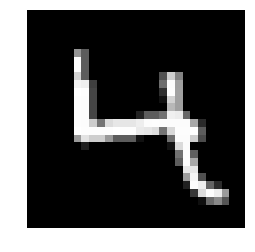

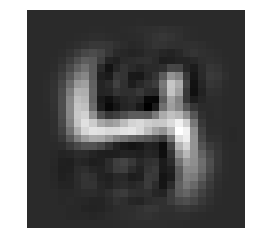

In [11]:
# Plotting a random number from original data. Then recontructing original data from PCS and potting the same number. Just for fun
vectortoimg(train_img[-30])
recons_train_pca = pca.inverse_transform(train_pca)
vectortoimg(recons_train_pca[-30])

In [12]:
print("=============== Bayes Classification based on original data with 784 dims ===============")
b1model = Bayes()
t0 = datetime.now()
b1model.fit(train_img, train_lbl[:,0])
print("Training time (ms): ", (datetime.now() - t0).microseconds/1000," (ms)")

=============== Bayes Classification based on original data with 784 dims ===============
Training time (ms):  33.439  (ms)


In [13]:
t0 = datetime.now()
print("train_img accuracy:", b1model.score(train_img, train_lbl[:,0]))
print("Time to compute train_img accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_img))

train_img accuracy: 0.8215952399471105
Time to compute train_img accuracy (ms):  283.172  Size:  51428


In [14]:
t0 = datetime.now()
print("test_img accuracy:", b1model.score(test_img, test_lbl[:,0]))
print("Time to compute test_img accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(test_img))


test_img accuracy: 0.7876808212785814
Time to compute test_img accuracy (ms):  531.342  Size:  8572


In [33]:

print("=============== Bayes Classification based on original data with 784 dims ===============")

=============== Bayes Classification based on original data with 784 dims ===============


In [74]:
print("=============== Confusion Matrix of Bayes Classification based on original data with 784 dims ===============")

=============== Confusion Matrix of Bayes Classification based on original data with 784 dims ===============


In [15]:
# Make predict
predict = b1model.predict(test_img)

In [46]:
# Import library for confusion matrix

from sklearn.metrics import confusion_matrix #train_img, test_img, train_lbl, test_lbl

In [18]:
confusionMatirix = confusion_matrix(test_lbl, predict)

In [19]:
# Import libraries to draw a plot

import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

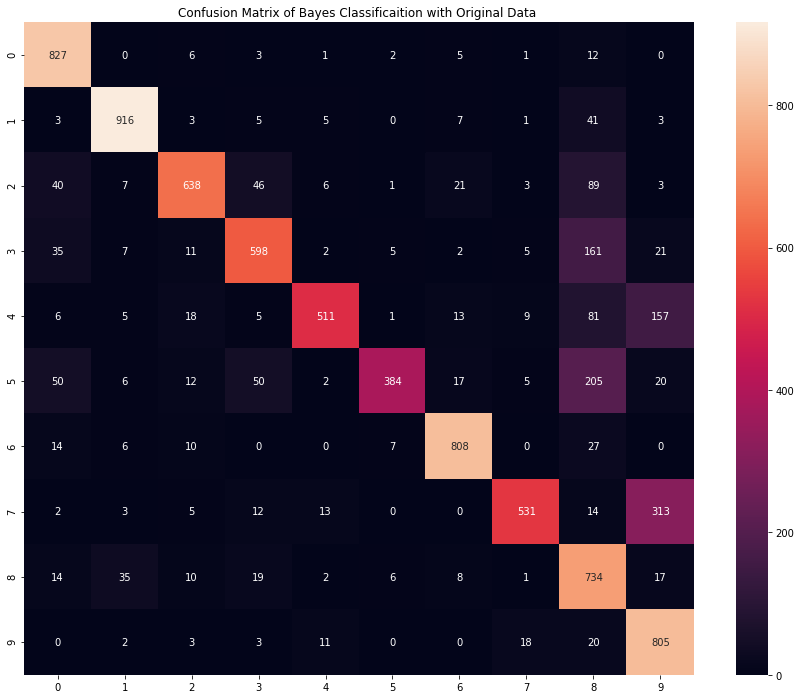

In [78]:
df = pd.DataFrame(confusionMatirix)
plt.figure(figsize =(15, 12))
plt.title("Confusion Matrix of Bayes Classificaition with Original Data ")
sns.heatmap(df, annot=True, fmt='.3g')

In [22]:
# Linear Classifier
print("=============== LinearRegression based on PCA ===============")

linearmodel1 = LinearRegression()
print("=============== Bayes Classification based on PCA ===============")
b2model = Bayes()
t0 = datetime.now()
b2model.fit(train_pca, train_lbl[:,0])
print("Training time (ms): ", (datetime.now() - t0).microseconds/1000," (ms)")

=============== LinearRegression based on PCA ===============
=============== Bayes Classification based on PCA ===============
Training time (ms):  78.105  (ms)


In [23]:
t0 = datetime.now()
print("train_pca accuracy:", b2model.score(train_pca, train_lbl[:,0]))
print("Time to compute train_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_pca))

train_pca accuracy: 0.9615967955199503
Time to compute train_pca accuracy (ms):  607.186  Size:  51428


In [24]:

t0 = datetime.now()
print("test_pca accuracy:", b2model.score(test_pca, test_lbl[:,0]))
print("Time to compute test_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size:  ", len(test_pca))

print("=============== Bayes Classification based on PCA ===============")

test_pca accuracy: 0.961502566495567
Time to compute test_pca accuracy (ms):  109.21  Size:   8572
=============== Bayes Classification based on PCA ===============


In [25]:
t0 = datetime.now()
linearmodel1.fit(train_pca, train_lbl[:,0])
print("Training time (ms): ", (datetime.now() - t0).microseconds/1000," (ms)")


Training time (ms):  192.717  (ms)


In [26]:
t0 = datetime.now()
print("train_pca accuracy:", linearmodel1.score(train_pca, train_lbl[:,0]))
print("Time to compute train_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_pca))


train_pca accuracy: 0.5540688783651455
Time to compute train_pca accuracy (ms):  0.0  Size:  51428


In [27]:
t0 = datetime.now()
print("test_pca accuracy:", linearmodel1.score(test_pca, test_lbl[:,0]))
print("Time to compute test_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(test_pca))

print("=============== LinearRegression based on PCA ===============")

test_pca accuracy: 0.5627617270669345
Time to compute test_pca accuracy (ms):  0.0  Size:  8572
=============== LinearRegression based on PCA ===============


In [ ]:
print("=============== Confusion Matrix of LinearRegression based on PCA ===============")

In [55]:
predict2 = linearmodel1.predict(test_pca)

In [56]:
confusionMatirix2 = confusion_matrix(test_lbl, predict2)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [40]:
df = pd.DataFrame(confusionMatirix2)
plt.figure(figsize =(15, 12))
plt.title("Confusion Matrix of Linear Classification based on PCA")
sns.heatmap(df, annot=True, fmt='.3g')

NameError: name 'confusionMatirix2' is not defined

In [ ]:
print("=============== Confusion Matrix of Bayes Classification based on PCA ===============")

In [48]:
predict3 = b2model.predict(test_pca)

In [49]:
confusionMatirix3 = confusion_matrix(test_lbl, predict3)

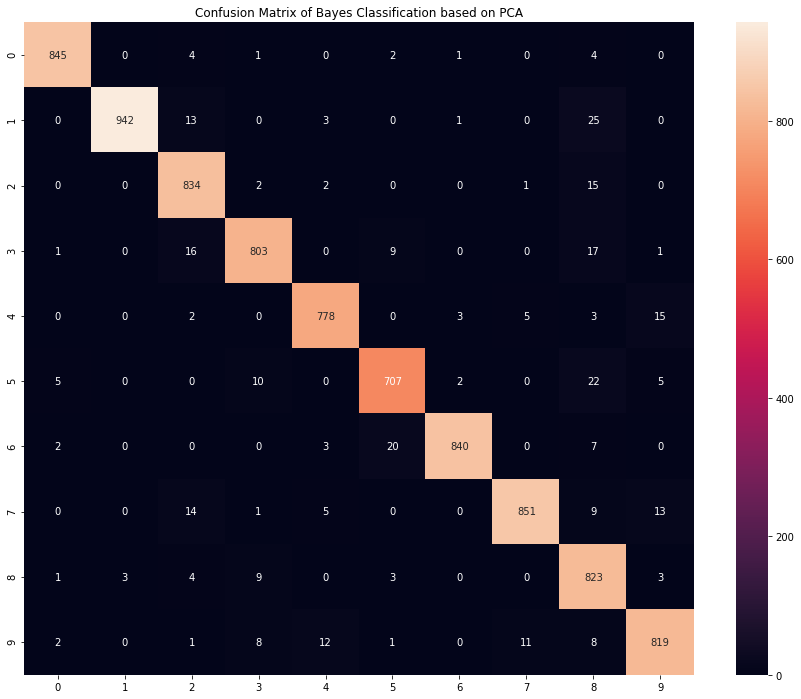

In [77]:
df = pd.DataFrame(confusionMatirix3)
plt.figure(figsize =(15, 12))
plt.title("Confusion Matrix of Bayes Classification based on PCA")
sns.heatmap(df, annot=True, fmt='.3g')

In [57]:
print("=============== LinearRegression with quadratic scaling factor 2 based on PCA ===============")

polynomial_features= PolynomialFeatures(degree=2)
train_pca_enlarged = polynomial_features.fit_transform(train_pca)
test_pca_enlarged = polynomial_features.fit_transform(test_pca)

=============== LinearRegression with quadratic scaling factor 2 based on PCA ===============


In [58]:
linearmodel = LinearRegression()

In [60]:
t0 = datetime.now()
linearmodel.fit(train_pca_enlarged, train_lbl[:,0])
print("Training time (ms) : ", (datetime.now() - t0).microseconds/1000," (ms)")

Training time (ms) :  845.871  (ms)


In [62]:
t0 = datetime.now()
print("train_pca_enlarged accuracy:", linearmodel.score(train_pca_enlarged, train_lbl[:,0]))
print("Time to compute train_pca_enlarged accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_pca_enlarged))

train_pca_enlarged accuracy: 0.8775863065736009
Time to compute train_pca_enlarged accuracy (ms):  234.295  Size:  51428


In [63]:
t0 = datetime.now()
print("test_pca_enlarged accuracy:", linearmodel.score(test_pca_enlarged, test_lbl[:,0]))
print("Time to compute train_pca_enlarged accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_pca_enlarged))

print("=============== LinearRegression with quadratic scaling factor 2 based on PCA ===============")


test_pca_enlarged accuracy: 0.874011404293853
Time to compute train_pca_enlarged accuracy (ms):  31.208  Size:  51428
=============== LinearRegression with quadratic scaling factor 2 based on PCA ===============


In [ ]:
print("=============== Confusion Matrix of LinearRegression with quadratic scaling factor 2 based on PCA ===============")

In [64]:
predict4 =linearmodel.predict(test_pca_enlarged)

In [65]:
confusionMatirix4 = confusion_matrix(test_lbl, predict4)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
df = pd.DataFrame(confusionMatirix4)
plt.figure(figsize =(15, 12))
plt.title("Confusion Matirix of LinearRegression with quadratic scaling factor 2 based on PCA")
sns.heatmap(df, annot=True, fmt='.3g')

In [66]:
# Logistic Classifier

print("=============== LogisticRegression based on PCA ===============")

logitmodel = LogisticRegression(random_state=0, solver='lbfgs',
                                 multi_class='multinomial', max_iter=100)

=============== LogisticRegression based on PCA ===============


In [67]:
t0 = datetime.now()
logitmodel.fit(train_pca, train_lbl[:,0])
print("Training time (ms): ", (datetime.now() - t0).microseconds/1000," (ms)")

Training time (ms):  852.719  (ms)


In [68]:
t0 = datetime.now()
print("train_pca accuracy:", logitmodel.score(train_pca, train_lbl[:,0]))
print("Time to compute train_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(train_pca))

train_pca accuracy: 0.9084350937232636
Time to compute train_pca accuracy (ms):  15.61  Size:  51428


In [69]:
t0 = datetime.now()
print("test_pca accuracy:", logitmodel.score(test_pca, test_lbl[:,0]))
print("Time to compute test_pca accuracy (ms): ", (datetime.now() - t0).microseconds/1000, " Size: ", len(test_pca))

print("=============== LogisticRegression based on PCA ===============")

test_pca accuracy: 0.9112225851609893
Time to compute test_pca accuracy (ms):  0.0  Size:  8572
=============== LogisticRegression based on PCA ===============


In [75]:
print("=============== Confusion Matrix of LogisticRegression based on PCA===============")

=============== Confusion Matrix of LogisticRegression based on PCA===============


In [71]:
predict5 =logitmodel.predict(test_pca)

In [72]:
confusionMatirix5 = confusion_matrix(test_lbl, predict5)

KeyError: 'y'

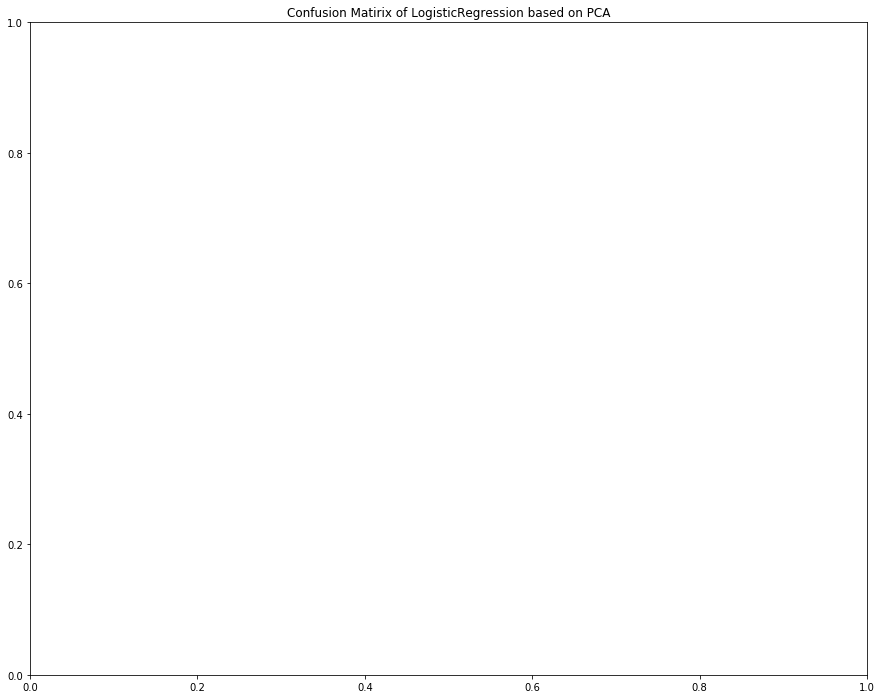

In [83]:
df = pd.DataFrame(confusionMatirix5)
plt.figure(figsize =(15, 12))
plt.title("Confusion Matirix of LogisticRegression based on PCA")
sns.heatmap(df, annot=True, fmt='.3g')
sns.heatmap(df.pivot_table(index='y', columns='x', values='z'), 
                             cbar_kws={'label': 'colorbar title'})
